In [21]:
import pandas as pd 
import numpy as np 
import seaborn as sns

sns.set(style='whitegrid')

train = pd.read_csv("../data/raw/train.csv")
TARGETS = train.iloc[:,-6:]

print(train.shape)
train.head(30)

(106800, 15)


,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0
5,1628180742,5,26.0,353733,5,26.0,2413091605,42516,Seizure,3,0,0,0,0,0
6,1628180742,6,30.0,353733,6,30.0,364593930,42516,Seizure,3,0,0,0,0,0
7,1628180742,7,36.0,353733,7,36.0,3811483573,42516,Seizure,3,0,0,0,0,0
8,1628180742,8,40.0,353733,8,40.0,3388718494,42516,Seizure,3,0,0,0,0,0
9,2277392603,0,0.0,924234,0,0.0,1978807404,30539,GPD,0,0,5,0,1,5


In [22]:
import matplotlib.pyplot as plt
TARGETS['sum'] = TARGETS.sum(axis=1) # sum = seizure_vote + lpd_vote + ... + other_vote

Index([ 1,  2,  3,  4,  5,  6,  7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28],
      dtype='int64', name='sum')


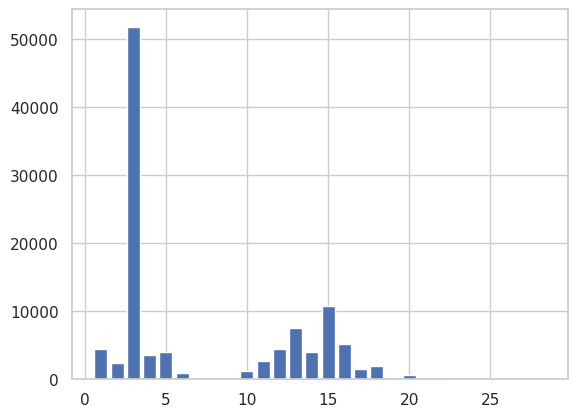

In [24]:
print(TARGETS['sum'].value_counts().index.sort_values()) # 결과보고 1~7, 10~28 2단계 학습 진행 가능
plt.bar(TARGETS['sum'].value_counts().index,TARGETS['sum'].value_counts().values)
plt.show()

<BarContainer object of 26 artists>

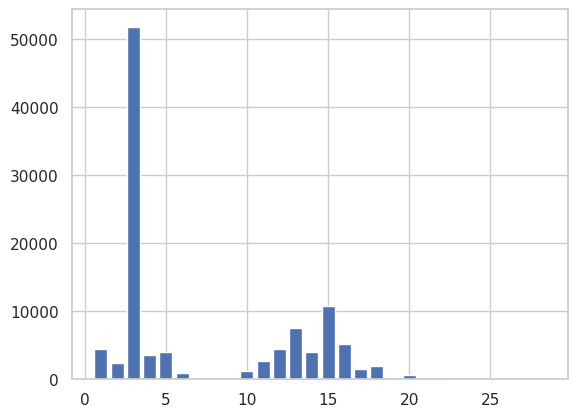

In [3]:
tmp = train.groupby('eeg_id')['eeg_label_offset_seconds'].agg(['max','min'])
print(tmp)

             max  min
eeg_id               
568657      16.0  0.0
582999      38.0  0.0
642382      24.0  0.0
751790       0.0  0.0
778705       0.0  0.0
...          ...  ...
4293354003   0.0  0.0
4293843368   0.0  0.0
4294455489   0.0  0.0
4294858825  12.0  0.0
4294958358   0.0  0.0

[17089 rows x 2 columns]


In [4]:
df =train.loc[train.eeg_id.isin(tmp[tmp['max']==0].index),:]

In [5]:
# 질병별 의사 진단 수
df['expert_consensus'].value_counts()

expert_consensus
Other      3719
LPD         861
GPD         688
GRDA        443
Seizure     442
LRDA        171
Name: count, dtype: int64

In [6]:
train[train['eeg_id']==4294858825]

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
33555,4294858825,0,0.0,657299228,0,0.0,561576493,4312,Other,0,0,0,0,1,14
33556,4294858825,1,2.0,657299228,1,2.0,2581506921,4312,Other,0,0,0,0,1,14
33557,4294858825,2,6.0,657299228,2,6.0,3251917981,4312,Other,0,0,0,0,1,14
33558,4294858825,3,8.0,657299228,3,8.0,3646714202,4312,Other,0,0,0,0,1,14
33559,4294858825,4,12.0,657299228,4,12.0,3219273381,4312,Other,0,0,0,0,1,14


In [8]:
tmp = train.groupby(['eeg_id','expert_consensus'])[['seizure_vote','lpd_vote','gpd_vote','lrda_vote','grda_vote','other_vote']].agg({'seizure_vote':'sum',
                                                                                                                                     'lpd_vote':'sum',
                                                                                                                                     'gpd_vote':'sum',
                                                                                                                                     'lrda_vote':'sum',
                                                                                                                                     'grda_vote':'sum',
                                                                                                                                     'other_vote':'sum'})

tmp = tmp.reset_index()
print(tmp.shape)
tmp.head()

(18013, 8)


,eeg_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,568657,Other,0,0,12,0,8,28
1,582999,LPD,0,132,0,11,0,11
2,642382,Other,0,0,0,0,0,2
3,751790,GPD,0,0,1,0,0,0
4,778705,Other,0,0,0,0,0,2


In [9]:
series_tmp_vc = tmp.eeg_id.value_counts()

tmp.loc[tmp.eeg_id.isin(series_tmp_vc[series_tmp_vc > 1].index), :]

,eeg_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
80,21379701,LPD,0,33,0,11,0,0
81,21379701,Other,3,0,0,3,0,8
82,21379701,Seizure,6,0,0,1,0,3
85,21746311,Other,2,0,0,0,0,3
86,21746311,Seizure,67,0,0,0,0,26
...,...,...,...,...,...,...,...,...
17969,4283246598,Seizure,6,0,0,0,0,0
17978,4284659653,LPD,0,90,0,0,0,9
17979,4284659653,LRDA,0,16,0,33,0,17
17980,4284659653,Other,9,0,0,9,2,31


In [23]:
train[train['eeg_id']==21379701]

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
90269,21379701,0,0.0,1841034439,158,2204.0,3556945898,32481,Other,1,0,0,1,0,2
90270,21379701,1,10.0,1841034439,159,2214.0,3225189518,32481,Other,1,0,0,1,0,2
90271,21379701,2,12.0,1841034439,160,2216.0,3059518038,32481,Other,1,0,0,1,0,2
90272,21379701,3,30.0,1841034439,161,2234.0,1565893564,32481,Seizure,2,0,0,1,0,1
90273,21379701,4,44.0,1841034439,162,2248.0,2941979767,32481,Seizure,2,0,0,0,0,1
90274,21379701,5,48.0,1841034439,163,2252.0,4290242864,32481,Seizure,2,0,0,0,0,1
90275,21379701,6,62.0,1841034439,164,2266.0,1468675763,32481,LPD,0,3,0,1,0,0
90276,21379701,7,76.0,1841034439,165,2280.0,4133046008,32481,LPD,0,3,0,1,0,0
90277,21379701,8,78.0,1841034439,166,2282.0,330235701,32481,LPD,0,3,0,1,0,0
90278,21379701,9,80.0,1841034439,167,2284.0,2090915320,32481,LPD,0,3,0,1,0,0


In [2]:
import numpy as np
patient_num = np.unique(train.patient_id)

In [59]:
i = 6
train[train.patient_id == patient_num[i]].loc[:,['eeg_id','eeg_sub_id','spectrogram_id','spectrogram_sub_id','expert_consensus',
                                                 'seizure_vote','lpd_vote','gpd_vote','lrda_vote','grda_vote','other_vote']]

,eeg_id,eeg_sub_id,spectrogram_id,spectrogram_sub_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
12709,630625254,0,248725092,0,Seizure,3,0,0,0,0,0
12710,630625254,1,248725092,1,Seizure,3,0,0,0,0,0
12711,630625254,2,248725092,2,Seizure,3,0,0,0,0,0
12712,630625254,3,248725092,3,Seizure,3,0,0,0,0,0
12713,630625254,4,248725092,4,Seizure,3,0,0,0,0,0
12714,630625254,5,248725092,5,Seizure,3,0,0,0,0,0
12715,630625254,6,248725092,6,Seizure,3,0,0,0,0,0
12716,630625254,7,248725092,7,Other,1,2,1,0,1,5
12717,630625254,8,248725092,8,Other,1,2,1,0,1,5
12718,630625254,9,248725092,9,Other,1,2,1,0,1,5


In [95]:
GET_ROW = 0
EEG_PATH = '../train_eegs/'
SPEC_PATH = '../train_spectrograms/'

train = pd.read_csv('../train.csv')
row = train.iloc[GET_ROW]

eeg = pd.read_parquet(f'{EEG_PATH}{row.eeg_id}.parquet')
eeg_offset = int( row.eeg_label_offset_seconds )
# eeg = eeg.iloc[eeg_offset*200:(eeg_offset+50)*200]

spectrogram = pd.read_parquet(f'{SPEC_PATH}{row.spectrogram_id}.parquet')
spec_offset = int( row.spectrogram_label_offset_seconds )
# spectrogram = spectrogram.loc[(spectrogram.time>=spec_offset)
                     #&(spectrogram.time<spec_offset+600)]


In [ ]:
spectrogram.head()

,time,LL_0.59,LL_0.78,LL_0.98,LL_1.17,LL_1.37,LL_1.56,LL_1.76,LL_1.95,LL_2.15,...,RP_18.16,RP_18.36,RP_18.55,RP_18.75,RP_18.95,RP_19.14,RP_19.34,RP_19.53,RP_19.73,RP_19.92
0,1,4.26,10.98,9.05,13.65,11.49,8.930000,18.840000,19.26,19.240000,...,0.31,0.17,0.28,0.19,0.24,0.27,0.29,0.16,0.22,0.19
1,3,2.65,3.97,12.18,13.26,14.21,13.230000,9.650000,8.11,11.280000,...,0.15,0.13,0.14,0.24,0.24,0.36,0.35,0.31,0.36,0.40
2,5,4.18,4.53,8.77,14.26,13.36,16.559999,19.219999,17.51,22.650000,...,0.29,0.21,0.16,0.25,0.28,0.28,0.34,0.48,0.44,0.48
3,7,2.41,3.21,4.92,8.07,5.97,12.420000,10.820000,14.96,21.809999,...,0.33,0.51,0.49,0.64,0.58,0.42,0.32,0.31,0.32,0.33
4,9,2.29,2.44,2.77,4.62,5.39,7.080000,9.840000,12.27,14.410000,...,0.44,0.38,0.48,0.63,0.45,0.45,0.49,0.33,0.31,0.34


In [93]:
print(columns[1], columns[101], columns[201], columns[301])

LL_0.78 RL_0.78 LP_0.78 RP_0.78


In [92]:
columns = np.array(spectrogram.columns)[1:]
LL=0
LP=0
RP=0
RR=0
for i in range(columns.shape[0]):
    if columns[i][0:2]=='LL':
        LL+=1
    elif columns[i][0:2]=='LP':
        LP+=1
    elif columns[i][0:2]=='RP':
        RP+=1
    elif columns[i][0:2]=='RL':
        RR+=1
print(LL,LP,RP,RR)


100 100 100 100


In [76]:
print(eeg.shape)

print((len(eeg)-10000)//2)

print()

(18000, 20)
4000


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106800 entries, 0 to 106799
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   eeg_id                            106800 non-null  int64  
 1   eeg_sub_id                        106800 non-null  int64  
 2   eeg_label_offset_seconds          106800 non-null  float64
 3   spectrogram_id                    106800 non-null  int64  
 4   spectrogram_sub_id                106800 non-null  int64  
 5   spectrogram_label_offset_seconds  106800 non-null  float64
 6   label_id                          106800 non-null  int64  
 7   patient_id                        106800 non-null  int64  
 8   expert_consensus                  106800 non-null  object 
 9   seizure_vote                      106800 non-null  int64  
 10  lpd_vote                          106800 non-null  int64  
 11  gpd_vote                          106800 non-null  i

In [7]:
# 수치 데이터 describe
train.describe() 

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
count,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000
mean,2.104387e+09,26.286189,118.817228,1.067262e+09,43.733596,520.431404,2.141415e+09,32304.428493,0.878024,1.138783,1.264925,0.948296,1.059185,1.966283
std,1.233371e+09,69.757658,314.557803,6.291475e+08,104.292116,1449.759868,1.241670e+09,18538.196252,1.538873,2.818845,3.131889,2.136799,2.228492,3.621180
min,5.686570e+05,0.000000,0.000000,3.537330e+05,0.000000,0.000000,3.380000e+02,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.026896e+09,1.000000,6.000000,5.238626e+08,2.000000,12.000000,1.067419e+09,16707.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.071326e+09,5.000000,26.000000,1.057904e+09,8.000000,62.000000,2.138332e+09,32068.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.172787e+09,16.000000,82.000000,1.623195e+09,29.000000,394.000000,3.217816e+09,48036.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000
max,4.294958e+09,742.000000,3372.000000,2.147388e+09,1021.000000,17632.000000,4.294934e+09,65494.000000,19.000000,18.000000,16.000000,15.000000,15.000000,25.000000


In [14]:
# 범주형 데이터 describe
categorical_columns = train.select_dtypes(include=['object', 'category']).columns
categorical_summary = train[categorical_columns].describe()
categorical_summary 

,expert_consensus
count,106800
unique,6
top,Seizure
freq,20933


In [15]:
list(set(train['expert_consensus'].unique()))

['LPD', 'GPD', 'GRDA', 'Seizure', 'Other', 'LRDA']

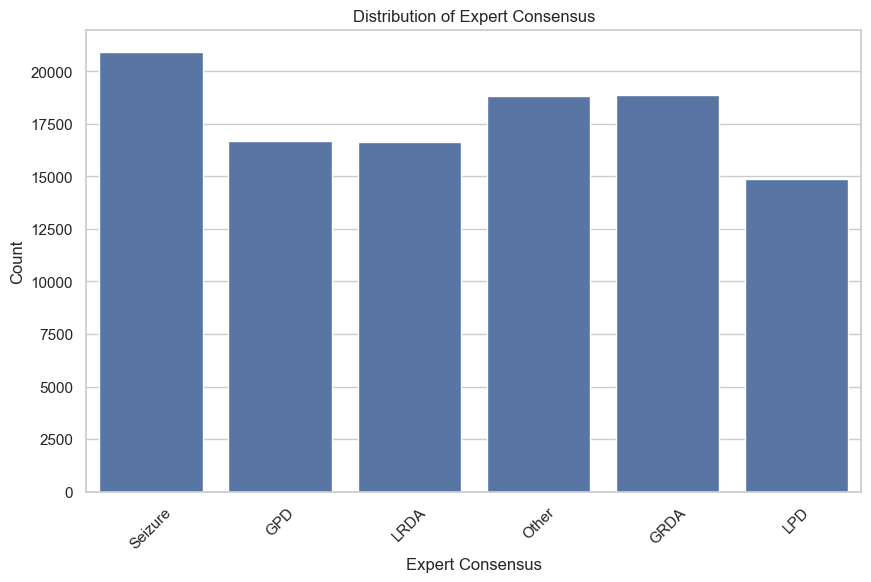

In [16]:
# 각 y(target)의 count 수
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,6))
sns.countplot(data=train, x='expert_consensus')
plt.title('Distribution of Expert Consensus')
plt.ylabel('Count')
plt.xlabel('Expert Consensus')
plt.xticks(rotation=45)
plt.show()

# 나름 balance하군

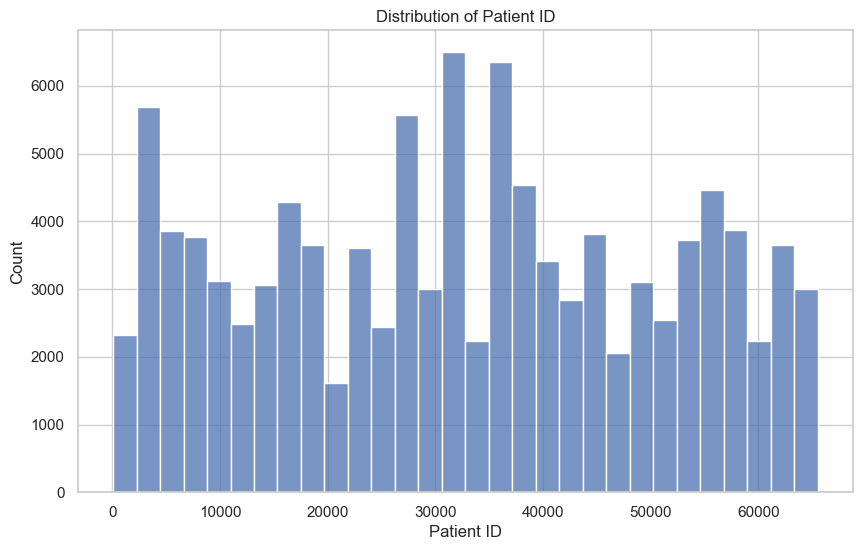

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(train['patient_id'], bins=30, kde=False)
plt.title('Distribution of Patient ID')
plt.xlabel('Patient ID')
plt.ylabel('Count')
plt.show()

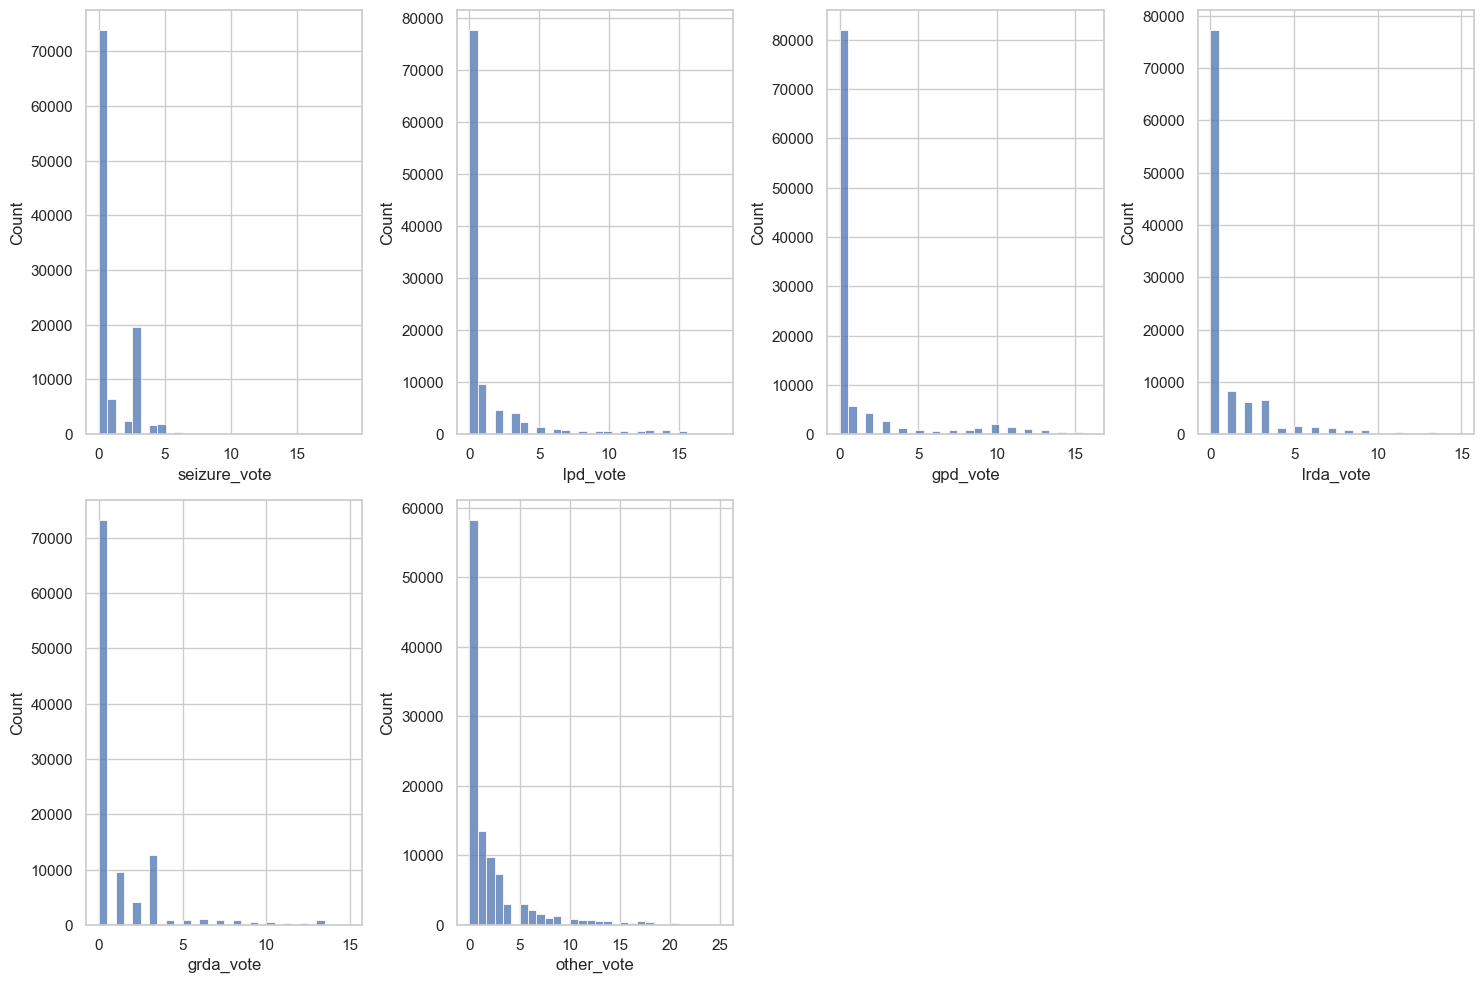

In [44]:
targets = list(train.columns[-6:]) # targets column 이름을 list로 저장

plt.figure(figsize=(15,10))
for i, column in enumerate(targets, 1):
    plt.subplot(2, 4, i)
    sns.histplot(train[column], kde=False, bins=30)

plt.tight_layout() # 각각의 y의 distribution


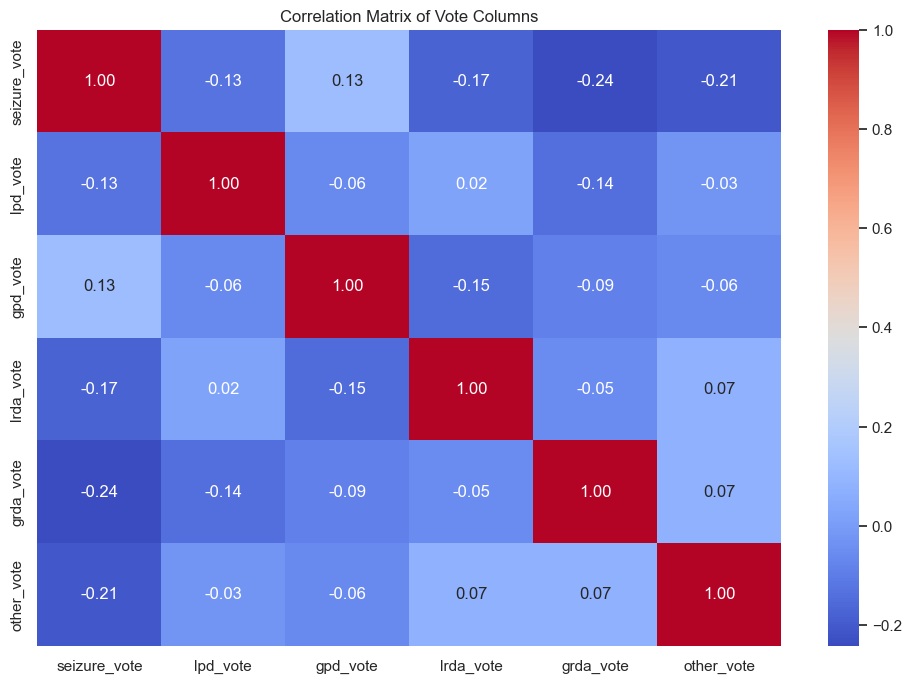

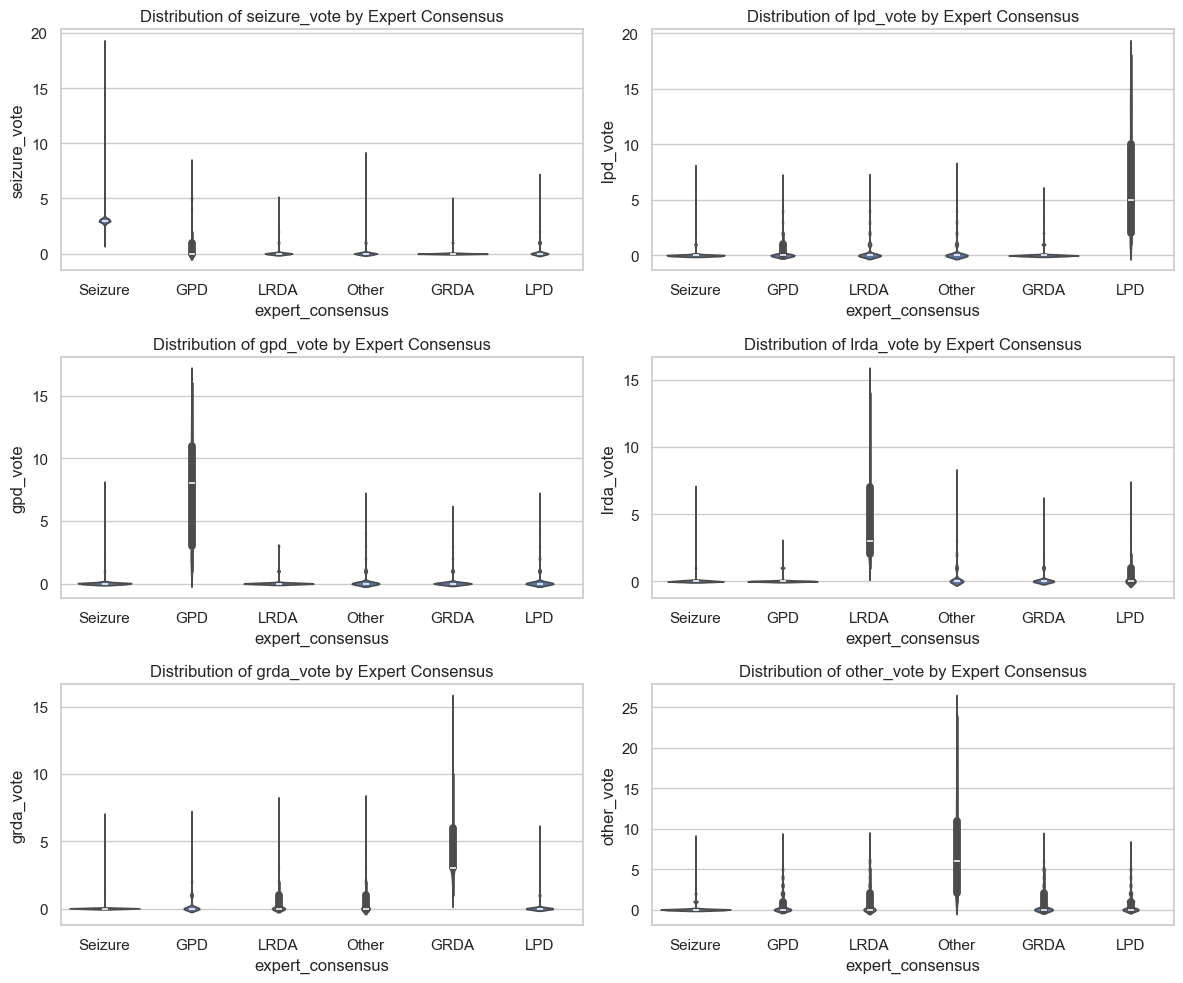

In [45]:
correlation_targets = train[targets].corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_targets, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Vote Columns')
plt.show()

plt.figure(figsize=(12,10))
for i, column in enumerate(targets, 1):
    plt.subplot(3, 2, i)
    sns.violinplot(data=train, x='expert_consensus', y=column)
    plt.title(f'Distribution of {column} by Expert Consensus')

plt.tight_layout()
plt.show()


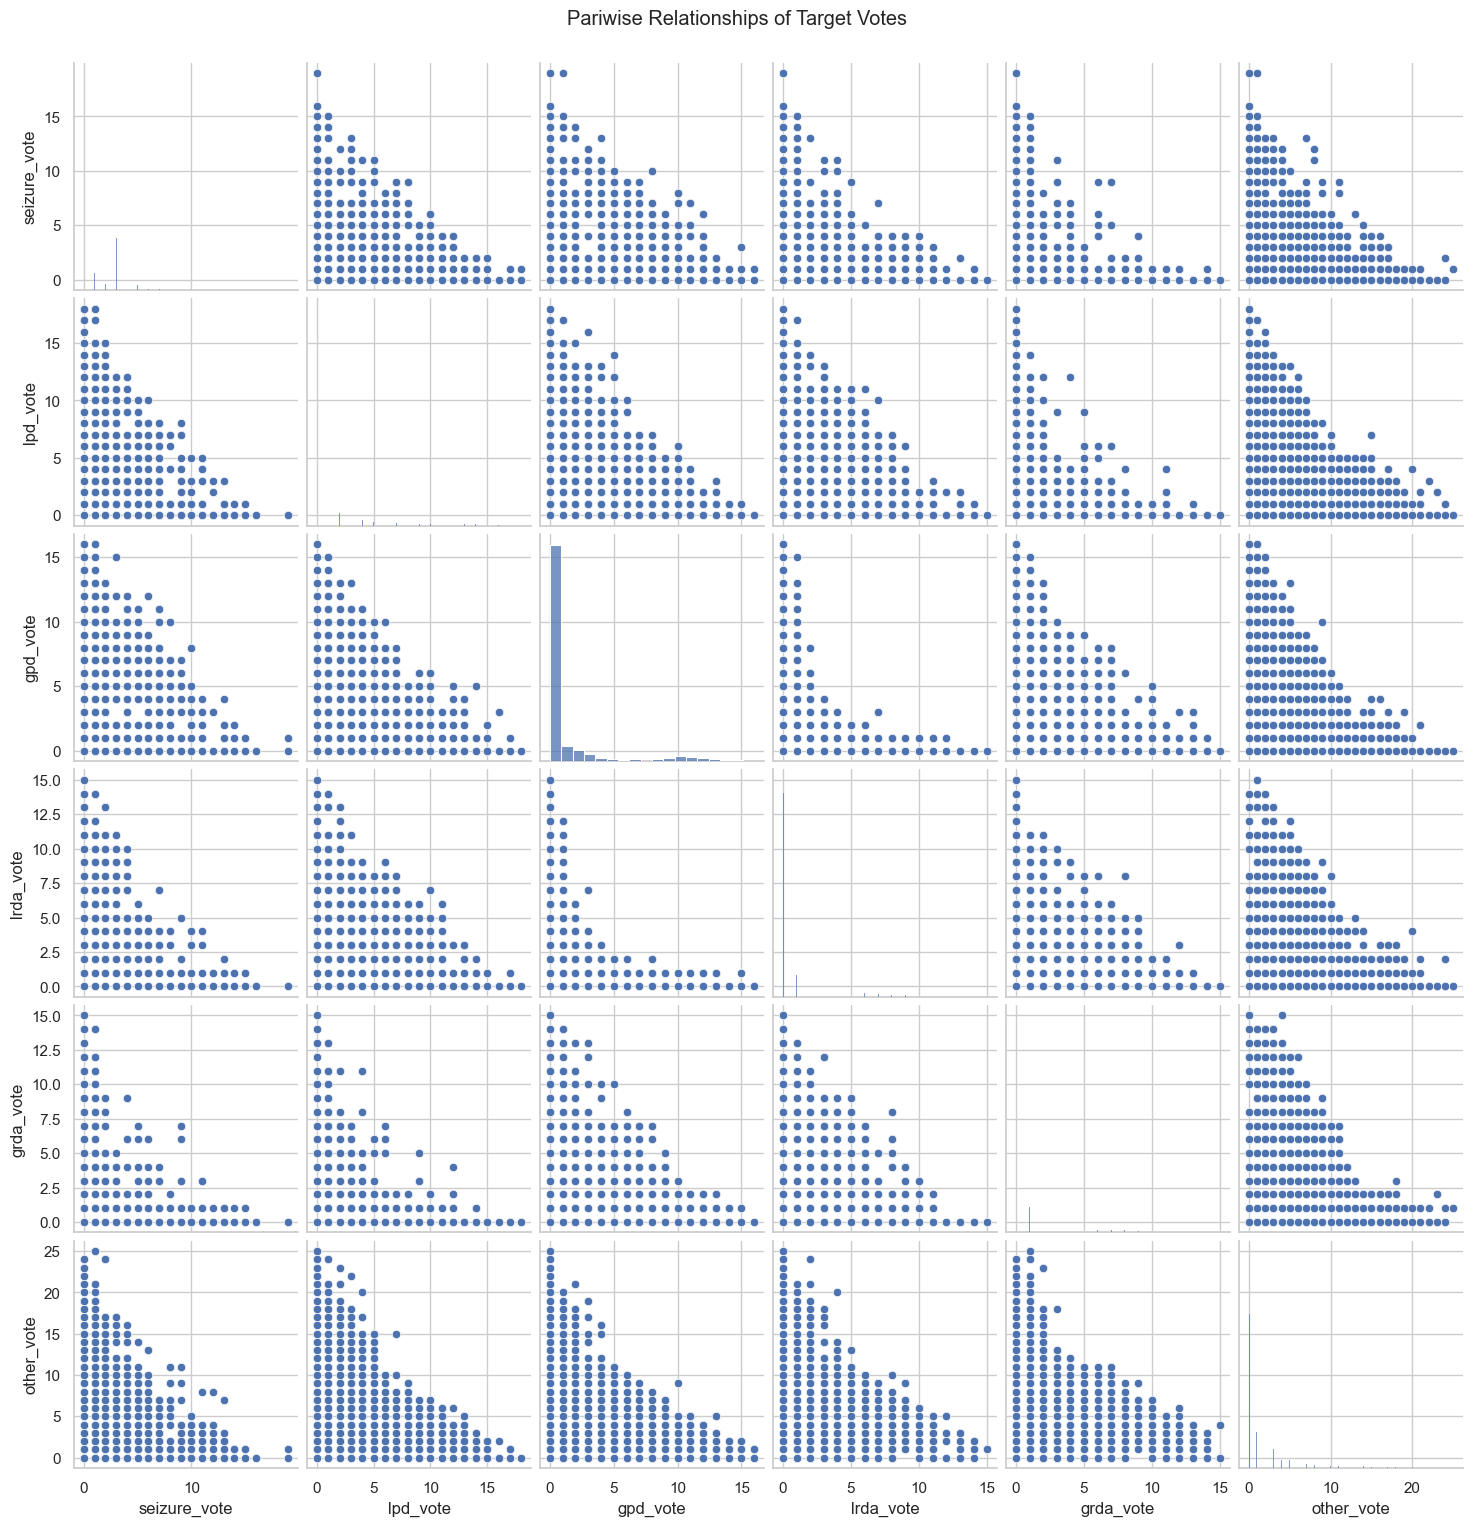

In [46]:
sns.pairplot(train[targets])
plt.suptitle('Pariwise Relationships of Target Votes', y=1.02)
plt.show()

In [50]:
offset_stats = train[['eeg_label_offset_seconds', 'spectrogram_label_offset_seconds']].describe()
offset_stats

,eeg_label_offset_seconds,spectrogram_label_offset_seconds
count,106800.000000,106800.000000
mean,118.817228,520.431404
std,314.557803,1449.759868
min,0.000000,0.000000
25%,6.000000,12.000000
50%,26.000000,62.000000
75%,82.000000,394.000000
max,3372.000000,17632.000000


In [56]:
patient2 = train[train['patient_id']==2641]

print(len(np.unique(patient2.eeg_id)))

95


In [58]:
patient2

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
3816,2268385034,0,0.0,59581280,0,0.0,2493455551,2641,Other,0,0,0,0,0,16
3817,2268385034,1,6.0,59581280,1,6.0,1455050057,2641,Other,0,0,0,0,0,16
3818,2268385034,2,10.0,59581280,2,10.0,3928244814,2641,Other,0,0,0,0,0,16
3819,2268385034,3,12.0,59581280,3,12.0,4053476693,2641,Other,0,0,0,0,0,16
3820,2268385034,4,14.0,59581280,4,14.0,3921597983,2641,Other,0,0,0,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101682,2882719839,143,740.0,2035369578,143,740.0,1579211465,2641,GPD,5,0,11,0,0,0
101683,2882719839,144,742.0,2035369578,144,742.0,2091205518,2641,GPD,5,0,11,0,0,0
101684,2882719839,145,746.0,2035369578,145,746.0,1161326931,2641,GPD,5,0,11,0,0,0
101685,2882719839,146,750.0,2035369578,146,750.0,3890913503,2641,GPD,5,0,11,0,0,0


In [53]:
train[train['eeg_label_offset_seconds'] ==3372]

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
69776,2259539799,742,3372.0,1391458063,742,3372.0,1822288123,2641,GPD,5,0,10,0,0,0


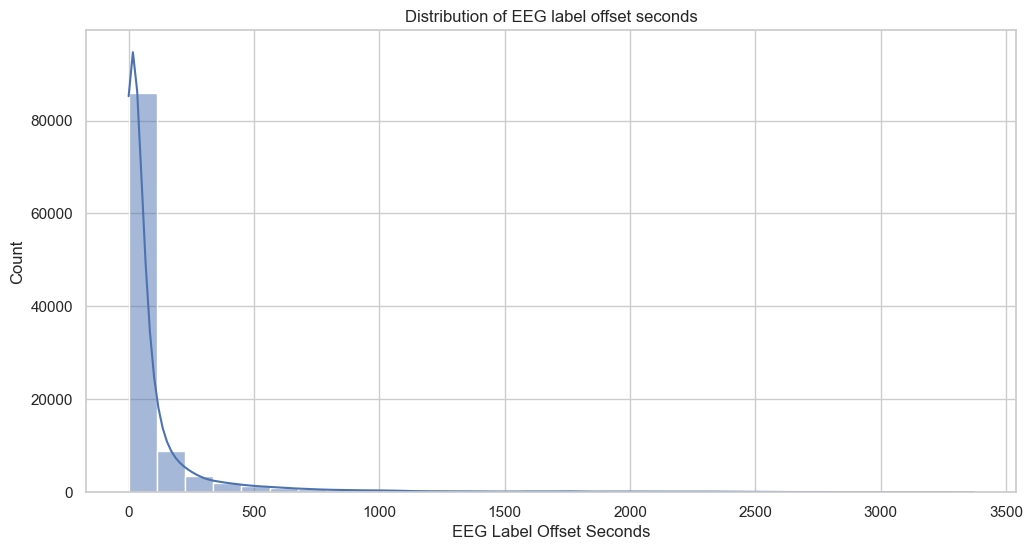

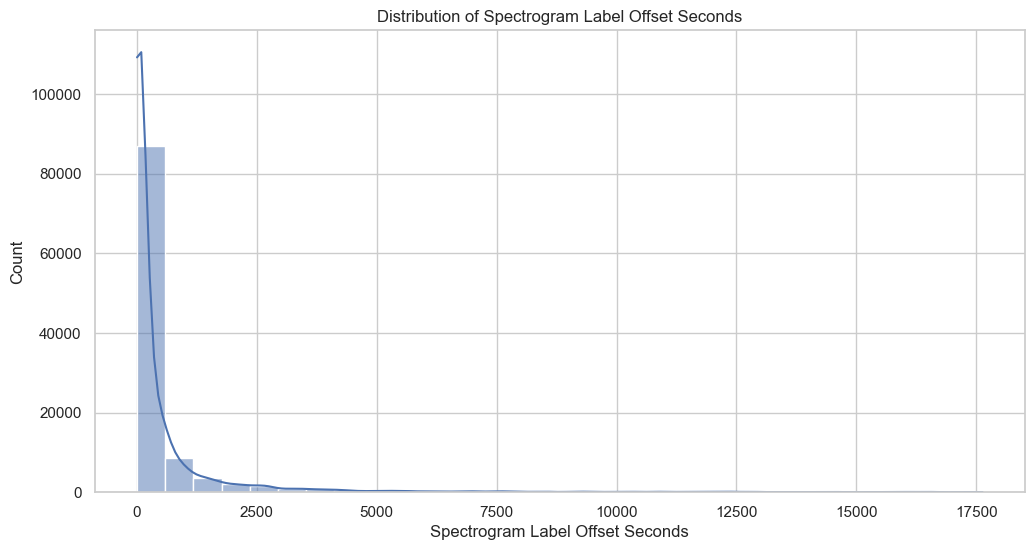

In [59]:
plt.figure(figsize=(12,6))
sns.histplot(train['eeg_label_offset_seconds'], bins=30, kde=True)
plt.title('Distribution of EEG label offset seconds')
plt.xlabel('EEG Label Offset Seconds')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(train['spectrogram_label_offset_seconds'], bins=30, kde=True)
plt.title('Distribution of Spectrogram Label Offset Seconds')
plt.xlabel('Spectrogram Label Offset Seconds')
plt.ylabel('Count')
plt.show()

In [70]:
# 한 eeg_id당 평균 몇 개의 eeg_sub_id를 갖고있는지
eeg_sub_id_count_per_eeg_id = train.groupby('eeg_id')['eeg_sub_id'].nunique()
spectrogram_sub_id_count_per_spectrogram_id = train.groupby('spectrogram_id')['spectrogram_sub_id'].nunique()


print(eeg_sub_id_count_per_eeg_id.describe())
print(spectrogram_sub_id_count_per_spectrogram_id.describe())

count    17089.000000
mean         6.249634
std         17.197882
min          1.000000
25%          1.000000
50%          3.000000
75%          6.000000
max        743.000000
Name: eeg_sub_id, dtype: float64


count    11138.000000
mean         9.588795
std         27.503031
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max       1022.000000
Name: spectrogram_sub_id, dtype: float64

<Figure size 1200x800 with 0 Axes>

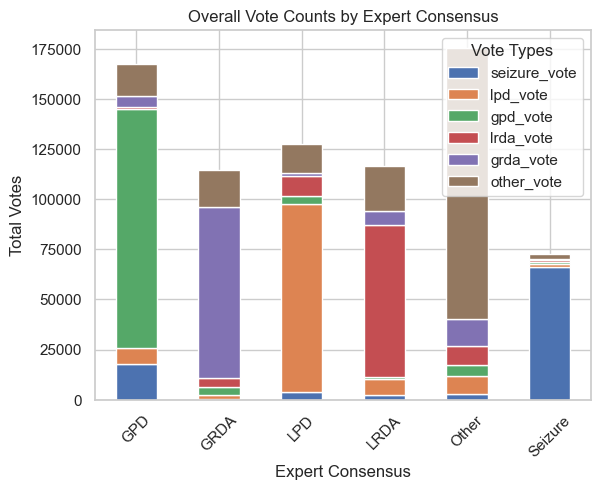

In [72]:
# Expert Consensus별 vote받은 개수ㅠ
vote_counts_by_consensus = train.groupby('expert_consensus')[targets].sum()

plt.figure(figsize=(12,8))
vote_counts_by_consensus.plot(kind='bar', stacked=True)
plt.title('Overall Vote Counts by Expert Consensus')
plt.xlabel('Expert Consensus')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.legend(title='Vote Types')
plt.show()

In [77]:
total_votes_per_pat = train.groupby('patient_id')[targets].sum().sum(axis=1)
normalized_votes = train.groupby('patient_id')[targets].sum().div(total_votes_per_pat, axis=0)
mean_vote_ratio = normalized_votes.mean()
print(mean_vote_ratio)

seizure_vote    0.310718
lpd_vote        0.046279
gpd_vote        0.051885
lrda_vote       0.081796
grda_vote       0.231471
other_vote      0.277851
dtype: float64


In [79]:
print(mean_vote_ratio)

seizure_vote    0.310718
lpd_vote        0.046279
gpd_vote        0.051885
lrda_vote       0.081796
grda_vote       0.231471
other_vote      0.277851
dtype: float64


In [ ]:
normalized_votes

,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
patient_id,,,,,,
56,0.000000,0.000000,0.020202,0.000000,0.000000,0.979798
105,0.000000,0.062893,0.000000,0.033019,0.275157,0.628931
149,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
195,0.000000,0.149163,0.179604,0.053272,0.295282,0.322679
198,0.068182,0.000000,0.000000,0.125000,0.102273,0.704545
...,...,...,...,...,...,...
65378,0.000000,0.004361,0.121771,0.023482,0.365649,0.484737
65430,0.104235,0.032573,0.000000,0.009772,0.013029,0.840391
65442,0.048077,0.051282,0.000000,0.125000,0.035256,0.740385


In [80]:
gap = 1 - sum([round(v, 6) for _, v in mean_vote_ratio.items()])
print(gap)
mean_vote_ratio['other_vote'] += gap

0.0


In [81]:
print(sum([round(v,5) for _, v in mean_vote_ratio.items()]))

print(mean_vote_ratio)


1.00001
seizure_vote    0.310718
lpd_vote        0.046279
gpd_vote        0.051885
lrda_vote       0.081796
grda_vote       0.231471
other_vote      0.277851
dtype: float64


In [23]:
a = train.groupby('patient_id').sum()
a

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
patient_id,,,,,,,,,,,,,,
56,112815537513,13,350.0,57032503496,53,11656.0,130454219116,OtherOtherOtherOtherOtherOtherOtherOtherOtherO...,0,0,2,0,0,97
105,111818707289,158,1588.0,65981045290,166,3836.0,117105714542,OtherOtherOtherOtherOtherOtherOtherOtherOtherO...,0,40,0,21,175,400
149,32331644596,16,40.0,11259173824,16,40.0,16051706904,GRDAGRDAGRDAGRDAGRDAGRDAGRDAGRDAGRDA,0,0,0,0,27,0
195,165843689974,337,1680.0,58517002349,352,4190.0,103094226513,GRDAGRDAGRDALRDALRDALRDALRDALRDAOtherOtherOthe...,0,98,118,35,194,212
198,7868409496,12,150.0,9526673486,12,150.0,20393464271,SeizureOtherOtherOtherOtherOtherOtherOtherOthe...,6,0,0,11,9,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65378,725985281599,3958,20944.0,352784666928,6193,213242.0,835527937196,OtherOtherOtherOtherOtherOtherOtherOtherOtherO...,0,13,363,70,1090,1445
65430,91913915262,72,410.0,49265435044,108,6386.0,94060323766,OtherOtherOtherOtherOtherSeizureSeizureSeizure...,32,10,0,3,4,258
65442,62965742380,52,296.0,24931530690,52,296.0,59749583085,OtherOtherOtherOtherOtherOtherOtherOtherOtherO...,15,16,0,39,11,231


In [3]:
print('unique 개수')
n = np.array(['eeg_id', 'spectrogram_id', 'patient_id'])
for i in n :
    print(i,':', len(np.unique(train[i])))

unique 개수
eeg_id : 17089
spectrogram_id : 11138
patient_id : 1950


In [4]:
GET_ROW = 0
EEG_PATH = 'train_eegs/'
SPEC_PATH = 'train_spectrograms/'

train = pd.read_csv('train.csv')
row = train.iloc[GET_ROW]

eeg = pd.read_parquet(f'{EEG_PATH}{row.eeg_id}.parquet')
eeg_offset = int( row.eeg_label_offset_seconds )
eeg = eeg.iloc[eeg_offset*200:(eeg_offset+50)*200]

spectrogram = pd.read_parquet(f'{SPEC_PATH}{row.spectrogram_id}.parquet')
spec_offset = int( row.spectrogram_label_offset_seconds )
spectrogram = spectrogram.loc[(spectrogram.time>=spec_offset)
                     &(spectrogram.time<spec_offset+600)]


FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
arr_eeg = np.zeros((10000,18))

route = [['Fp1','F7'], ['F7','T3'], ['T3','T5'],['T5','O1'],
         ['Fp2','F8'], ['F8','T4'], ['T4','T6'], ['T6','O2'],
         ['Fp1','F3'], ['F3','C3'], ['C3','P3'], ['P3','O1'],
         ['Fp2','F4'], ['F4','C4'], ['C4','P4'], ['P4','O2'],
         ['Fz','Cz'], ['Cz','Pz']]

for i, a in enumerate(route):
    arr_eeg[:,i] = eeg[a[0]] - eeg[a[1]]


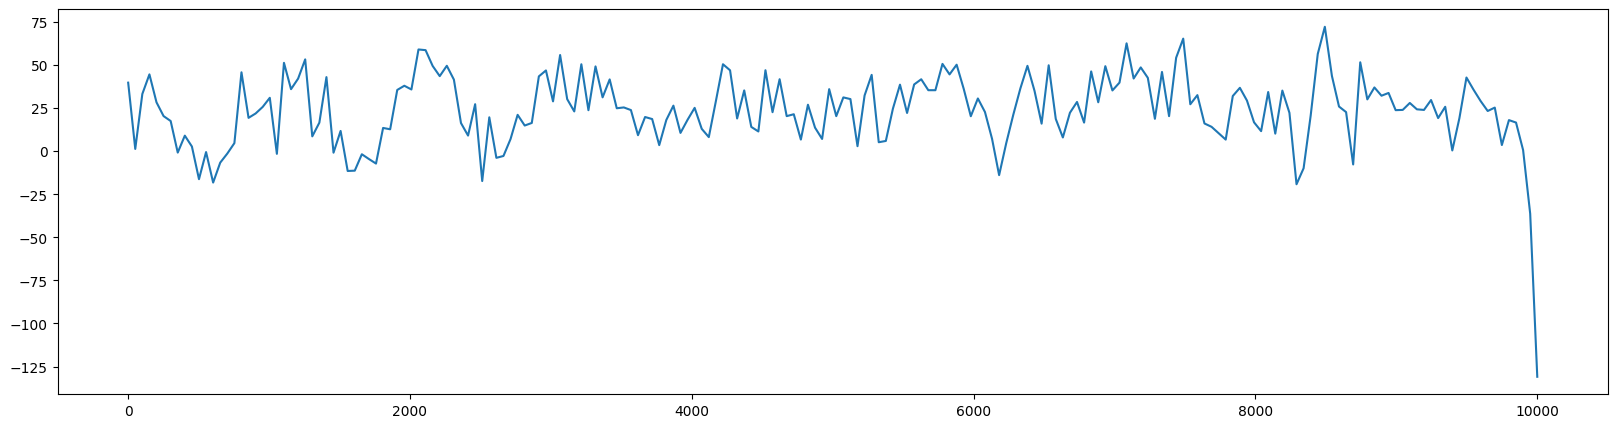

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.interpolate import make_interp_spline, BSpline

plt.figure(figsize=(20,5))
n = 10000
spl = make_interp_spline(range(n), arr_eeg[:,0], k=3)
smooth = spl(np.linspace(0, n, 200))
plt.plot(np.linspace(0, n, 200), smooth)
plt.show()

In [ ]:
arr_eeg.shape

(10000, 18)

In [ ]:
spectrogram.head()

,time,LL_0.59,LL_0.78,LL_0.98,LL_1.17,LL_1.37,LL_1.56,LL_1.76,LL_1.95,LL_2.15,...,RP_18.16,RP_18.36,RP_18.55,RP_18.75,RP_18.95,RP_19.14,RP_19.34,RP_19.53,RP_19.73,RP_19.92
0,1,4.26,10.98,9.05,13.65,11.49,8.930000,18.840000,19.26,19.240000,...,0.31,0.17,0.28,0.19,0.24,0.27,0.29,0.16,0.22,0.19
1,3,2.65,3.97,12.18,13.26,14.21,13.230000,9.650000,8.11,11.280000,...,0.15,0.13,0.14,0.24,0.24,0.36,0.35,0.31,0.36,0.40
2,5,4.18,4.53,8.77,14.26,13.36,16.559999,19.219999,17.51,22.650000,...,0.29,0.21,0.16,0.25,0.28,0.28,0.34,0.48,0.44,0.48
3,7,2.41,3.21,4.92,8.07,5.97,12.420000,10.820000,14.96,21.809999,...,0.33,0.51,0.49,0.64,0.58,0.42,0.32,0.31,0.32,0.33
4,9,2.29,2.44,2.77,4.62,5.39,7.080000,9.840000,12.27,14.410000,...,0.44,0.38,0.48,0.63,0.45,0.45,0.49,0.33,0.31,0.34
